In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

!whoami
!date

beatrixh
Wed Jun  9 12:26:05 PDT 2021


In [3]:
ls /ihme/costeffectiveness/results/vivarium_nih_us_cvd/model_1/nih_us_cvd/2021_06_08_15_22_18/count_data/

deaths.csv                     disease_transition_count.hdf  ylds.csv
deaths.hdf                     person_time.csv               ylds.hdf
disease_state_person_time.csv  person_time.hdf               ylls.csv
disease_state_person_time.hdf  population.csv                ylls.hdf
disease_transition_count.csv   population.hdf


In [4]:
sim_results_dir = '/ihme/costeffectiveness/results/vivarium_nih_us_cvd/model_1/nih_us_cvd/2021_06_08_15_22_18/count_data/'

In [5]:
# main_dir = '/home/j/Project/simulation_science/ciff_malnutrition/'
# sim_result_dir = '/ihme/costeffectiveness/results/vivarium_ciff_sam/v1.1_causes_multiple_draws/ciff_sam/2021_05_19_13_17_54/count_data/'
# output_dir = main_dir + f'verification_and_validation/v1.0_causes/'

In [6]:
# what shape are the results?
deaths_explore = pd.read_csv(sim_results_dir + 'deaths.csv')
deaths_explore.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,age
0,0,female,2021,acute_ischemic_stroke,death,29,baseline,0.0,25_to_29
1,1,female,2021,acute_ischemic_stroke,death,29,baseline,0.0,30_to_34
2,2,female,2021,acute_ischemic_stroke,death,29,baseline,0.0,35_to_39
3,3,female,2021,acute_ischemic_stroke,death,29,baseline,0.0,40_to_44
4,4,female,2021,acute_ischemic_stroke,death,29,baseline,0.0,45_to_49


In [7]:
# did the run contain everything expected?
deaths_explore.cause.unique()

array(['acute_ischemic_stroke', 'acute_myocardial_infarction', 'angina',
       'chronic_ischemic_stroke', 'other_causes',
       'post_myocardial_infarction'], dtype=object)

In [8]:
deaths_explore.input_draw.nunique()

10

In [9]:
deaths_explore.input_draw.unique()

array([ 29, 232, 357, 394, 602, 629, 650, 680, 829, 946])

In [10]:
deaths_explore.sex.unique()

array(['female', 'male'], dtype=object)

In [11]:
deaths_explore.year.nunique()

20

In [12]:
deaths_explore.year.unique()

array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040])

In [13]:
pop_explore = pd.read_csv(sim_results_dir + 'population.csv')
pop_explore

,Unnamed: 0,measure,input_draw,scenario,value
0,0,total_population,29,baseline,750000.0
1,1,total_population,232,baseline,750000.0
2,2,total_population,357,baseline,750000.0
3,3,total_population,394,baseline,750000.0
...,...,...,...,...,...
46,46,total_population_untracked,650,baseline,0.0
47,47,total_population_untracked,680,baseline,0.0
48,48,total_population_untracked,829,baseline,0.0
49,49,total_population_untracked,946,baseline,0.0


In [14]:
#no one is becoming untracked
pop_explore.loc[pop_explore.measure=="total_population_untracked"].value.sum()

0.0

In [15]:
pop_explore.measure.unique()

array(['total_population', 'total_population_dead',
       'total_population_living', 'total_population_tracked',
       'total_population_untracked'], dtype=object)

In [16]:
#unit is person-years?

pt_explore = pd.read_csv(sim_results_dir + 'person_time.csv')
pt_explore

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,age
0,0,female,2021,person_time,29,baseline,34583.081672,25_to_29
1,1,female,2021,person_time,29,baseline,35748.335480,30_to_34
2,2,female,2021,person_time,29,baseline,35620.940605,35_to_39
3,3,female,2021,person_time,29,baseline,33414.103976,40_to_44
...,...,...,...,...,...,...,...,...
5996,5996,male,2040,person_time,946,baseline,13110.525147,80_to_84
5997,5997,male,2040,person_time,946,baseline,6913.814078,85_to_89
5998,5998,male,2040,person_time,946,baseline,2854.973278,90_to_94
5999,5999,male,2040,person_time,946,baseline,1037.188716,95_plus


In [17]:
statept_explore = pd.read_csv(sim_results_dir + 'disease_state_person_time.csv')
statept_explore

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,age
0,0,female,2021,acute_ischemic_stroke,state_person_time,29,baseline,0.328542,25_to_29
1,1,female,2021,acute_ischemic_stroke,state_person_time,29,baseline,0.657084,30_to_34
2,2,female,2021,acute_ischemic_stroke,state_person_time,29,baseline,0.492813,35_to_39
3,3,female,2021,acute_ischemic_stroke,state_person_time,29,baseline,0.821355,40_to_44
...,...,...,...,...,...,...,...,...,...
41996,41996,male,2040,susceptible_to_ischemic_stroke,state_person_time,946,baseline,10953.018480,80_to_84
41997,41997,male,2040,susceptible_to_ischemic_stroke,state_person_time,946,baseline,5732.566735,85_to_89
41998,41998,male,2040,susceptible_to_ischemic_stroke,state_person_time,946,baseline,2414.045175,90_to_94
41999,41999,male,2040,susceptible_to_ischemic_stroke,state_person_time,946,baseline,875.236140,95_plus


In [18]:
statept_explore.cause.unique()

array(['acute_ischemic_stroke', 'acute_myocardial_infarction', 'angina',
       'chronic_ischemic_stroke', 'post_myocardial_infarction',
       'susceptible_to_ischemic_heart_disease',
       'susceptible_to_ischemic_stroke'], dtype=object)

In [19]:
transition_explore = pd.read_csv(sim_results_dir + 'disease_transition_count.csv')
transition_explore

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,age
0,0,female,2021,acute_ischemic_stroke_to_chronic_ischemic_stro...,29,baseline,4.0,25_to_29
1,1,female,2021,acute_ischemic_stroke_to_chronic_ischemic_stro...,29,baseline,8.0,30_to_34
2,2,female,2021,acute_ischemic_stroke_to_chronic_ischemic_stro...,29,baseline,6.0,35_to_39
3,3,female,2021,acute_ischemic_stroke_to_chronic_ischemic_stro...,29,baseline,9.0,40_to_44
...,...,...,...,...,...,...,...,...
35996,35996,male,2040,susceptible_to_ischemic_stroke_to_acute_ischem...,946,baseline,54.0,80_to_84
35997,35997,male,2040,susceptible_to_ischemic_stroke_to_acute_ischem...,946,baseline,34.0,85_to_89
35998,35998,male,2040,susceptible_to_ischemic_stroke_to_acute_ischem...,946,baseline,19.0,90_to_94
35999,35999,male,2040,susceptible_to_ischemic_stroke_to_acute_ischem...,946,baseline,13.0,95_plus


In [20]:
transition_explore.measure.unique()

array(['acute_ischemic_stroke_to_chronic_ischemic_stroke_event_count',
       'acute_myocardial_infarction_to_post_myocardial_infarction_event_count',
       'chronic_ischemic_stroke_to_acute_ischemic_stroke_event_count',
       'post_myocardial_infarction_to_acute_myocardial_infarction_event_count',
       'susceptible_to_ischemic_heart_disease_to_acute_myocardial_infarction_event_count',
       'susceptible_to_ischemic_stroke_to_acute_ischemic_stroke_event_count'],
      dtype=object)

In [21]:
ylds_explore = pd.read_csv(sim_results_dir + 'ylds.csv')
ylds_explore

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,age
0,0,female,2021,acute_ischemic_stroke,ylds,29,baseline,0.000198,25_to_29
1,1,female,2021,acute_ischemic_stroke,ylds,29,baseline,0.000501,30_to_34
2,2,female,2021,acute_ischemic_stroke,ylds,29,baseline,0.000383,35_to_39
3,3,female,2021,acute_ischemic_stroke,ylds,29,baseline,0.000656,40_to_44
...,...,...,...,...,...,...,...,...,...
29996,29996,male,2040,post_myocardial_infarction,ylds,946,baseline,56.509628,80_to_84
29997,29997,male,2040,post_myocardial_infarction,ylds,946,baseline,39.641846,85_to_89
29998,29998,male,2040,post_myocardial_infarction,ylds,946,baseline,18.446375,90_to_94
29999,29999,male,2040,post_myocardial_infarction,ylds,946,baseline,5.626883,95_plus


In [22]:
ylls_explore = pd.read_csv(sim_results_dir + 'ylls.csv')
ylls_explore

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,age
0,0,female,2021,acute_ischemic_stroke,ylls,29,baseline,0.000000,25_to_29
1,1,female,2021,acute_ischemic_stroke,ylls,29,baseline,0.000000,30_to_34
2,2,female,2021,acute_ischemic_stroke,ylls,29,baseline,0.000000,35_to_39
3,3,female,2021,acute_ischemic_stroke,ylls,29,baseline,0.000000,40_to_44
...,...,...,...,...,...,...,...,...,...
35996,35996,male,2040,post_myocardial_infarction,ylls,946,baseline,1691.684283,80_to_84
35997,35997,male,2040,post_myocardial_infarction,ylls,946,baseline,1131.964536,85_to_89
35998,35998,male,2040,post_myocardial_infarction,ylls,946,baseline,395.593277,90_to_94
35999,35999,male,2040,post_myocardial_infarction,ylls,946,baseline,94.839047,95_plus


# Sim results

In [23]:
def load_sim_count_data(sim_results_dir: str):
    columns = ['age', 'sex', 'year', 'input_draw', 'scenario', 'measure']
    df = {}
    fnames = ['deaths', 'disease_transition_count', 'disease_state_person_time', 'person_time']
    for fname in fnames:
        df[fname] = pd.read_csv(sim_results_dir + fname + '.csv', index_col=0)
        # get aggregated results if stratifications exist
        if 'cause' in df[fname].columns:
            df[fname] = df[fname].groupby(columns + ['cause']).value.sum().reset_index()
        else:
            df[fname] = df[fname].groupby(columns).value.sum().reset_index()
    return df

In [24]:
df = load_sim_count_data(sim_results_dir)

### DEATH counts 

In [25]:
df['deaths'].cause.unique()

array(['acute_ischemic_stroke', 'acute_myocardial_infarction', 'angina',
       'chronic_ischemic_stroke', 'other_causes',
       'post_myocardial_infarction'], dtype=object)

In [26]:
# deaths
deaths_count_ais = df['deaths'].query('cause == "acute_ischemic_stroke"')

In [27]:
deaths_count_ais.head()

,age,sex,year,input_draw,scenario,measure,cause,value
0,25_to_29,female,2021,29,baseline,death,acute_ischemic_stroke,0.0
6,25_to_29,female,2021,232,baseline,death,acute_ischemic_stroke,0.0
12,25_to_29,female,2021,357,baseline,death,acute_ischemic_stroke,0.0
18,25_to_29,female,2021,394,baseline,death,acute_ischemic_stroke,0.0
24,25_to_29,female,2021,602,baseline,death,acute_ischemic_stroke,0.0


In [28]:
total_deaths_count = (df['deaths']
                     .groupby(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure'])
                     .value.sum()
                     .reset_index())

total_deaths_count['cause'] = 'all_causes'

In [29]:
total_deaths_count.head()

,age,sex,year,input_draw,scenario,measure,value,cause
0,25_to_29,female,2021,29,baseline,death,33.0,all_causes
1,25_to_29,female,2021,232,baseline,death,19.0,all_causes
2,25_to_29,female,2021,357,baseline,death,41.0,all_causes
3,25_to_29,female,2021,394,baseline,death,21.0,all_causes
4,25_to_29,female,2021,602,baseline,death,40.0,all_causes


### incidence counts

In [30]:
df['disease_transition_count'].measure.unique()

array(['acute_ischemic_stroke_to_chronic_ischemic_stroke_event_count',
       'acute_myocardial_infarction_to_post_myocardial_infarction_event_count',
       'chronic_ischemic_stroke_to_acute_ischemic_stroke_event_count',
       'post_myocardial_infarction_to_acute_myocardial_infarction_event_count',
       'susceptible_to_ischemic_heart_disease_to_acute_myocardial_infarction_event_count',
       'susceptible_to_ischemic_stroke_to_acute_ischemic_stroke_event_count'],
      dtype=object)

In [31]:
df['disease_transition_count'].query(
    'measure == "susceptible_to_ischemic_heart_disease_to_acute_myocardial_infarction_event_count" | measure == "post_myocardial_infarction_to_acute_myocardial_infarction_event_count"'
)

,age,sex,year,input_draw,scenario,measure,value
3,25_to_29,female,2021,29,baseline,post_myocardial_infarction_to_acute_myocardial...,0.0
4,25_to_29,female,2021,29,baseline,susceptible_to_ischemic_heart_disease_to_acute...,12.0
9,25_to_29,female,2021,232,baseline,post_myocardial_infarction_to_acute_myocardial...,0.0
10,25_to_29,female,2021,232,baseline,susceptible_to_ischemic_heart_disease_to_acute...,14.0
...,...,...,...,...,...,...,...
35991,95_plus,male,2040,829,baseline,post_myocardial_infarction_to_acute_myocardial...,3.0
35992,95_plus,male,2040,829,baseline,susceptible_to_ischemic_heart_disease_to_acute...,38.0
35997,95_plus,male,2040,946,baseline,post_myocardial_infarction_to_acute_myocardial...,10.0
35998,95_plus,male,2040,946,baseline,susceptible_to_ischemic_heart_disease_to_acute...,36.0


In [32]:
#incident cases of acute mi (?) (does this want to be summed with other ways to transition into acute mi?)
incidence_mi_count = df['disease_transition_count'].query(
    'measure == "susceptible_to_ischemic_heart_disease_to_acute_myocardial_infarction_event_count" | measure == "post_myocardial_infarction_to_acute_myocardial_infarction_event_count"'
)

incidence_mi_count['cause'] = 'acute_myocardial_infarction'
incidence_mi_count['measure'] = 'incidence'

incidence_mi_count.head()

,age,sex,year,input_draw,scenario,measure,value,cause
3,25_to_29,female,2021,29,baseline,incidence,0.0,acute_myocardial_infarction
4,25_to_29,female,2021,29,baseline,incidence,12.0,acute_myocardial_infarction
9,25_to_29,female,2021,232,baseline,incidence,0.0,acute_myocardial_infarction
10,25_to_29,female,2021,232,baseline,incidence,14.0,acute_myocardial_infarction
15,25_to_29,female,2021,357,baseline,incidence,0.0,acute_myocardial_infarction


In [33]:
# not sure if this represents a remission? need to understand cause model
remission_mi_count = df['disease_transition_count'].query(
    'measure == "acute_myocardial_infarction_to_post_myocardial_infarction_event_count"'
)
remission_mi_count['cause'] = 'myocardial_infarction' #is this the right cause?
remission_mi_count['measure'] = 'remission'

remission_mi_count.head()

,age,sex,year,input_draw,scenario,measure,value,cause
1,25_to_29,female,2021,29,baseline,remission,6.0,myocardial_infarction
7,25_to_29,female,2021,232,baseline,remission,11.0,myocardial_infarction
13,25_to_29,female,2021,357,baseline,remission,11.0,myocardial_infarction
19,25_to_29,female,2021,394,baseline,remission,10.0,myocardial_infarction
25,25_to_29,female,2021,602,baseline,remission,7.0,myocardial_infarction


### person-time

In [34]:
statept_explore = pd.read_csv(sim_results_dir + 'disease_state_person_time.csv')
statept_explore

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,age
0,0,female,2021,acute_ischemic_stroke,state_person_time,29,baseline,0.328542,25_to_29
1,1,female,2021,acute_ischemic_stroke,state_person_time,29,baseline,0.657084,30_to_34
2,2,female,2021,acute_ischemic_stroke,state_person_time,29,baseline,0.492813,35_to_39
3,3,female,2021,acute_ischemic_stroke,state_person_time,29,baseline,0.821355,40_to_44
...,...,...,...,...,...,...,...,...,...
41996,41996,male,2040,susceptible_to_ischemic_stroke,state_person_time,946,baseline,10953.018480,80_to_84
41997,41997,male,2040,susceptible_to_ischemic_stroke,state_person_time,946,baseline,5732.566735,85_to_89
41998,41998,male,2040,susceptible_to_ischemic_stroke,state_person_time,946,baseline,2414.045175,90_to_94
41999,41999,male,2040,susceptible_to_ischemic_stroke,state_person_time,946,baseline,875.236140,95_plus


In [35]:
df['disease_state_person_time'].cause.unique()

array(['acute_ischemic_stroke', 'acute_myocardial_infarction', 'angina',
       'chronic_ischemic_stroke', 'post_myocardial_infarction',
       'susceptible_to_ischemic_heart_disease',
       'susceptible_to_ischemic_stroke'], dtype=object)

In [36]:
person_time_ais = df['disease_state_person_time'].query('cause == "acute_ischemic_stroke"')
person_time_cis = df['disease_state_person_time'].query('cause == "chronic_ischemic_stroke"')


person_time_sus_is = df['disease_state_person_time'].query('cause == "susceptible_to_ischemic_stroke"')

In [37]:
person_time_cis.head()

,age,sex,year,input_draw,scenario,measure,cause,value
3,25_to_29,female,2021,29,baseline,state_person_time,chronic_ischemic_stroke,167.720739
10,25_to_29,female,2021,232,baseline,state_person_time,chronic_ischemic_stroke,173.552361
17,25_to_29,female,2021,357,baseline,state_person_time,chronic_ischemic_stroke,158.275154
24,25_to_29,female,2021,394,baseline,state_person_time,chronic_ischemic_stroke,188.665298
31,25_to_29,female,2021,602,baseline,state_person_time,chronic_ischemic_stroke,194.332649


# Measures

In [39]:
def get_measure(data: pd.DataFrame):
    # rate per PY among source population
    
    result = (data.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(df['person_time'].drop(columns='measure').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
    
    result_summary = (result
                      .groupby(['age', 'sex', 'year', 'scenario', 'measure', 'cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

#note the numerator is 'data' and denominator is df['person_time]

### ACMR and CSMR

In [40]:
deaths_count_ais

,age,sex,year,input_draw,scenario,measure,cause,value
0,25_to_29,female,2021,29,baseline,death,acute_ischemic_stroke,0.0
6,25_to_29,female,2021,232,baseline,death,acute_ischemic_stroke,0.0
12,25_to_29,female,2021,357,baseline,death,acute_ischemic_stroke,0.0
18,25_to_29,female,2021,394,baseline,death,acute_ischemic_stroke,0.0
...,...,...,...,...,...,...,...,...
35976,95_plus,male,2040,650,baseline,death,acute_ischemic_stroke,2.0
35982,95_plus,male,2040,680,baseline,death,acute_ischemic_stroke,5.0
35988,95_plus,male,2040,829,baseline,death,acute_ischemic_stroke,4.0
35994,95_plus,male,2040,946,baseline,death,acute_ischemic_stroke,8.0


In [41]:
df['person_time']

,age,sex,year,input_draw,scenario,measure,value
0,25_to_29,female,2021,29,baseline,person_time,34583.081672
1,25_to_29,female,2021,232,baseline,person_time,34453.993472
2,25_to_29,female,2021,357,baseline,person_time,34470.632361
3,25_to_29,female,2021,394,baseline,person_time,34575.951132
...,...,...,...,...,...,...,...
5996,95_plus,male,2040,650,baseline,person_time,1192.924438
5997,95_plus,male,2040,680,baseline,person_time,1189.274151
5998,95_plus,male,2040,829,baseline,person_time,798.255664
5999,95_plus,male,2040,946,baseline,person_time,1037.188716


In [42]:
# deaths acmr + csmr

acmr = get_measure(total_deaths_count)

In [43]:
deaths_ais = get_measure(deaths_count_ais)

In [44]:
deaths_ais.age.unique()

array(['25_to_29', '30_to_34', '35_to_39', '40_to_44', '45_to_49',
       '50_to_54', '55_to_59', '60_to_64', '65_to_69', '70_to_74',
       '75_to_79', '80_to_84', '85_to_89', '90_to_94', '95_plus'],
      dtype=object)

In [45]:
# death counts due to acute ischemic stroke in ages >=60
deaths_ais.loc[deaths_ais.age.isin(['60_to_64', '65_to_69', '70_to_74',
       '75_to_79', '80_to_84', '85_to_89', '90_to_94', '95_plus'])]

,age,sex,year,scenario,measure,cause,mean,2.5%,97.5%
280,60_to_64,female,2021,baseline,death,acute_ischemic_stroke,0.000032,0.000000,0.000074
281,60_to_64,female,2022,baseline,death,acute_ischemic_stroke,0.000032,0.000000,0.000074
282,60_to_64,female,2023,baseline,death,acute_ischemic_stroke,0.000037,0.000006,0.000095
283,60_to_64,female,2024,baseline,death,acute_ischemic_stroke,0.000019,0.000000,0.000047
...,...,...,...,...,...,...,...,...,...
596,95_plus,male,2037,baseline,death,acute_ischemic_stroke,0.004023,0.002020,0.007004
597,95_plus,male,2038,baseline,death,acute_ischemic_stroke,0.005173,0.002701,0.008940
598,95_plus,male,2039,baseline,death,acute_ischemic_stroke,0.003964,0.001106,0.006399
599,95_plus,male,2040,baseline,death,acute_ischemic_stroke,0.004348,0.001735,0.007635


# PREVALENCE
#### 'prevalence' = 'infected_person_time' / 'person_time'


In [46]:
#numerator

person_time_ais.head() #40 rows

,age,sex,year,input_draw,scenario,measure,cause,value
0,25_to_29,female,2021,29,baseline,state_person_time,acute_ischemic_stroke,0.328542
7,25_to_29,female,2021,232,baseline,state_person_time,acute_ischemic_stroke,0.082136
14,25_to_29,female,2021,357,baseline,state_person_time,acute_ischemic_stroke,0.164271
21,25_to_29,female,2021,394,baseline,state_person_time,acute_ischemic_stroke,0.164271
28,25_to_29,female,2021,602,baseline,state_person_time,acute_ischemic_stroke,0.328542


In [47]:
#denominator

df['person_time'].head() #40 rows

,age,sex,year,input_draw,scenario,measure,value
0,25_to_29,female,2021,29,baseline,person_time,34583.081672
1,25_to_29,female,2021,232,baseline,person_time,34453.993472
2,25_to_29,female,2021,357,baseline,person_time,34470.632361
3,25_to_29,female,2021,394,baseline,person_time,34575.951132
4,25_to_29,female,2021,602,baseline,person_time,34577.588350


In [48]:
# prevalence
prevalence_ais = get_measure(person_time_ais)

In [49]:
prevalence_ais.head()

,age,sex,year,scenario,measure,cause,mean,2.5%,97.5%
0,25_to_29,female,2021,baseline,state_person_time,acute_ischemic_stroke,0.000006,0.000000e+00,0.000013
1,25_to_29,female,2022,baseline,state_person_time,acute_ischemic_stroke,0.000007,6.784988e-07,0.000018
2,25_to_29,female,2023,baseline,state_person_time,acute_ischemic_stroke,0.000008,0.000000e+00,0.000016
3,25_to_29,female,2024,baseline,state_person_time,acute_ischemic_stroke,0.000004,0.000000e+00,0.000012
4,25_to_29,female,2025,baseline,state_person_time,acute_ischemic_stroke,0.000004,0.000000e+00,0.000019


# INCIDENCE 

In [50]:
#numerator: incidence_{cause}_count
incidence_mi_count

,age,sex,year,input_draw,scenario,measure,value,cause
3,25_to_29,female,2021,29,baseline,incidence,0.0,acute_myocardial_infarction
4,25_to_29,female,2021,29,baseline,incidence,12.0,acute_myocardial_infarction
9,25_to_29,female,2021,232,baseline,incidence,0.0,acute_myocardial_infarction
10,25_to_29,female,2021,232,baseline,incidence,14.0,acute_myocardial_infarction
...,...,...,...,...,...,...,...,...
35991,95_plus,male,2040,829,baseline,incidence,3.0,acute_myocardial_infarction
35992,95_plus,male,2040,829,baseline,incidence,38.0,acute_myocardial_infarction
35997,95_plus,male,2040,946,baseline,incidence,10.0,acute_myocardial_infarction
35998,95_plus,male,2040,946,baseline,incidence,36.0,acute_myocardial_infarction


In [51]:
incidence_mi_count.age.unique()

array(['25_to_29', '30_to_34', '35_to_39', '40_to_44', '45_to_49',
       '50_to_54', '55_to_59', '60_to_64', '65_to_69', '70_to_74',
       '75_to_79', '80_to_84', '85_to_89', '90_to_94', '95_plus'],
      dtype=object)

In [52]:
df['disease_state_person_time'].cause.unique()

array(['acute_ischemic_stroke', 'acute_myocardial_infarction', 'angina',
       'chronic_ischemic_stroke', 'post_myocardial_infarction',
       'susceptible_to_ischemic_heart_disease',
       'susceptible_to_ischemic_stroke'], dtype=object)

In [53]:
person_time_sus_mi = df['disease_state_person_time'].query('cause == "susceptible_to_ischemic_heart_disease" | cause == "post_myocardial_infarction"')

In [54]:
def get_transition(data_numerator: pd.DataFrame, data_denominator: pd.DataFrame):
    # rate per PY among source population
    
    result = (data_numerator.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(data_denominator.drop(columns='measure').drop(columns='cause').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
    
#     result['age_group'] = np.where(result['age'] == 'early_neonatal', 1,
#                               np.where(result['age'] == 'late_neonatal', 2,
#                                        np.where(result['age'] == 'post_neonatal',3,
#                                         4)))
    
    result_summary = (result
                      .groupby(['age','sex', 'year', 'scenario', 'measure','cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

In [57]:
incidence_mi = get_transition(incidence_mi_count, person_time_sus_mi)

In [58]:
incidence_mi.head()

,age,sex,year,scenario,measure,cause,mean,2.5%,97.5%
0,25_to_29,female,2021,baseline,incidence,acute_myocardial_infarction,0.060366,0.0,0.383073
1,25_to_29,female,2022,baseline,incidence,acute_myocardial_infarction,0.056557,0.0,0.310349
2,25_to_29,female,2023,baseline,incidence,acute_myocardial_infarction,0.045270,0.0,0.258221
3,25_to_29,female,2024,baseline,incidence,acute_myocardial_infarction,0.039681,0.0,0.298478
4,25_to_29,female,2025,baseline,incidence,acute_myocardial_infarction,0.034867,0.0,0.188879


# REMISSION

In [60]:
# remission
# remission_mi = get_transition(remission_mi_count, person_time_mi) #haven't defined person_time_mi

# EXCESS MORTALITY RATE
#### 'excess_mortality_rate' = 'deaths from cause' / 'infected_person_time'

In [61]:
def get_emr(data_numerator: pd.DataFrame, data_denominator: pd.DataFrame):
    # rate per PY among source population
    
    result = (data_numerator.set_index(['age', 'sex', 'year', 'input_draw', 'scenario', 'measure', 'cause'])
              .div(data_denominator.drop(columns='measure').drop(columns='cause').set_index(['age', 'sex', 'year', 'input_draw', 'scenario']))
              .reset_index())
        
    result_summary = (result
                      .groupby(['age', 'sex', 'year', 'scenario', 'measure','cause'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
    
    return result_summary

In [62]:
emr_ais = get_emr(deaths_count_ais, person_time_ais)

In [63]:
emr_ais.head()

,age,sex,year,scenario,measure,cause,mean,2.5%,97.5%
0,25_to_29,female,2021,baseline,death,acute_ischemic_stroke,0.000000,0.0,0.000000
1,25_to_29,female,2022,baseline,death,acute_ischemic_stroke,0.000000,0.0,0.000000
2,25_to_29,female,2023,baseline,death,acute_ischemic_stroke,0.380469,0.0,2.511094
3,25_to_29,female,2024,baseline,death,acute_ischemic_stroke,inf,0.0,inf
4,25_to_29,female,2025,baseline,death,acute_ischemic_stroke,0.000000,0.0,0.000000


In [64]:
emr_ais.age.unique()

array(['25_to_29', '30_to_34', '35_to_39', '40_to_44', '45_to_49',
       '50_to_54', '55_to_59', '60_to_64', '65_to_69', '70_to_74',
       '75_to_79', '80_to_84', '85_to_89', '90_to_94', '95_plus'],
      dtype=object)

# ARTIFACT

In [65]:
ls /ihme/costeffectiveness/artifacts/vivarium_nih_us_cvd/washington.hdf

/ihme/costeffectiveness/artifacts/vivarium_nih_us_cvd/washington.hdf


In [66]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_nih_us_cvd/washington.hdf', filter_terms=['year_start == 2019', 'age_start >=  60'])

In [67]:
#load population structure

art_pop = art.load('population.structure').reset_index()
art_pop

,location,sex,age_start,age_end,year_start,year_end,value
0,Washington,Female,60.0,65.0,2019,2020,241635.167758
1,Washington,Female,65.0,70.0,2019,2020,215623.466050
2,Washington,Female,70.0,75.0,2019,2020,169710.752701
3,Washington,Female,75.0,80.0,2019,2020,112681.821337
...,...,...,...,...,...,...,...
12,Washington,Male,80.0,85.0,2019,2020,56858.516056
13,Washington,Male,85.0,90.0,2019,2020,31285.292471
14,Washington,Male,90.0,95.0,2019,2020,13441.369777
15,Washington,Male,95.0,125.0,2019,2020,4154.435898


In [68]:
#what's available to us?
art.keys

['metadata.keyspace',
 'metadata.locations',
 'population.location',
 'population.structure',
 'population.age_bins',
 'population.demographic_dimensions',
 'population.theoretical_minimum_risk_life_expectancy',
 'cause.all_causes.cause_specific_mortality_rate',
 'cause.ischemic_heart_disease.cause_specific_mortality_rate',
 'cause.ischemic_heart_disease.restrictions',
 'cause.acute_myocardial_infarction.prevalence',
 'cause.post_myocardial_infarction.prevalence',
 'cause.angina.prevalence',
 'cause.acute_myocardial_infarction.incidence_rate',
 'cause.post_myocardial_infarction.incidence_rate',
 'cause.angina.incidence_rate',
 'cause.acute_myocardial_infarction.excess_mortality_rate',
 'cause.post_myocardial_infarction.excess_mortality_rate',
 'cause.angina.excess_mortality_rate',
 'cause.acute_myocardial_infarction.disability_weight',
 'cause.post_myocardial_infarction.disability_weight',
 'cause.angina.disability_weight',
 'cause.ischemic_stroke.cause_specific_mortality_rate',
 'caus

In [69]:
art_angina_incidence = art.load('cause.angina.incidence_rate').reset_index()

In [70]:
art_angina_incidence.head()

,sex,age_start,age_end,year_start,year_end,draw_0,draw_1,draw_2,draw_3,draw_4,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,Female,60.0,65.0,2019,2020,0.000224,0.000380,0.000339,0.000390,0.000310,...,0.000374,0.000327,0.000308,0.000318,0.000319,0.000445,0.000458,0.000295,0.000376,0.000313
1,Female,65.0,70.0,2019,2020,0.000490,0.000474,0.000491,0.000595,0.000593,...,0.000748,0.000539,0.000466,0.000595,0.000411,0.000824,0.000545,0.000454,0.000648,0.000418
2,Female,70.0,75.0,2019,2020,0.000691,0.000570,0.000715,0.000740,0.000808,...,0.001148,0.000757,0.000656,0.000938,0.000597,0.000991,0.000749,0.000773,0.000836,0.000852
3,Female,75.0,80.0,2019,2020,0.000828,0.000668,0.001011,0.000825,0.000955,...,0.001575,0.000982,0.000878,0.001348,0.000876,0.000946,0.001068,0.001253,0.000940,0.001614
4,Female,80.0,85.0,2019,2020,0.001117,0.001062,0.001283,0.001111,0.001577,...,0.002194,0.001527,0.001548,0.001437,0.001331,0.001138,0.001519,0.001847,0.001435,0.001931


In [122]:
# define function to load data from artifact for a specified cause and measure
# this function is called in the next function below

def load_artifact_data(cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['washington']: #in case there are other countries
        
        # grab main artifact object
        art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        # load requested measure
        data = art.load('cause.' + cause + '.' + measure)
        
        # collapse to desired percentiles
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        # formatting (may want to format age as well)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
        master_art_data = master_art_data.append(data)
        
    return master_art_data

# PLOT sim vs artifact

In [123]:
def add_age_midpoint(data: pd.DataFrame, output: str):
    data = data.copy()
    if output == 'sim':
        data['age_midpoint'] = list(map(lambda x, y: y-int(x.split('_to_')[1])+2, data['age'], data['year']))
    else:
        data['age_midpoint'] = data['age_group'].map(lambda x: int(x.split(' ')[0])+2)
    return data

### ART DATA

In [124]:
art_acmr = load_artifact_data('all_causes', 'cause_specific_mortality_rate')

In [125]:
art_acmr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure
0,female,0.000000,0.019178,2019,2020,0.105003,0.096205,0.114231,Washington,cause_specific_mortality_rate
1,female,0.019178,0.076712,2019,2020,0.009078,0.008359,0.009862,Washington,cause_specific_mortality_rate
2,female,0.076712,1.000000,2019,2020,0.001341,0.001258,0.001428,Washington,cause_specific_mortality_rate
3,female,1.000000,5.000000,2019,2020,0.000148,0.000141,0.000156,Washington,cause_specific_mortality_rate
4,female,5.000000,10.000000,2019,2020,0.000090,0.000088,0.000092,Washington,cause_specific_mortality_rate


In [148]:
art_csmr_ais = load_artifact_data('acute_ischemic_stroke','cause_specific_mortality_rate')

ArtifactException: cause.acute_ischemic_stroke.cause_specific_mortality_rate should be in /ihme/costeffectiveness/artifacts/vivarium_nih_us_cvd/washington.hdf.

In [126]:
#ARTIFACT

#mortality
art_acmr = load_artifact_data('all_causes', 'cause_specific_mortality_rate')
art_csmr_angina = load_artifact_data('angina','cause_specific_mortality_rate')
# art_csmr_lri = load_artifact_data('lower_respiratory_infections','cause_specific_mortality_rate')
# art_csmr_msls = load_artifact_data('measles','cause_specific_mortality_rate')

#prevalence 
art_prevalence_angina = load_artifact_data('angina','prevalence')
# art_prevalence_lri = load_artifact_data('lower_respiratory_infections','prevalence')
# art_prevalence_msls = load_artifact_data('measles','prevalence')

#incidence
art_incidence_angina = load_artifact_data('angina','incidence_rate')
# art_incidence_lri = load_artifact_data('lower_respiratory_infections', 'incidence_rate')
# art_incidence_msls = load_artifact_data('measles','incidence_rate')

#remission
# art_remission_angina = load_artifact_data('angina','remission_rate') # we don't have angina remission

#emr
art_emr_angina = load_artifact_data('angina','excess_mortality_rate')
# art_emr_lri = load_artifact_data('lower_respiratory_infections','excess_mortality_rate')
# art_emr_msls = load_artifact_data('measles','excess_mortality_rate')

In [127]:
art_acmr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure
0,female,0.000000,0.019178,2019,2020,0.105003,0.096205,0.114231,Washington,cause_specific_mortality_rate
1,female,0.019178,0.076712,2019,2020,0.009078,0.008359,0.009862,Washington,cause_specific_mortality_rate
2,female,0.076712,1.000000,2019,2020,0.001341,0.001258,0.001428,Washington,cause_specific_mortality_rate
3,female,1.000000,5.000000,2019,2020,0.000148,0.000141,0.000156,Washington,cause_specific_mortality_rate
4,female,5.000000,10.000000,2019,2020,0.000090,0.000088,0.000092,Washington,cause_specific_mortality_rate


### SIM DATA 

In [128]:
#SIM // load this for the dfs we've got loaded up thus far

#mortality (5)
acmr = get_measure(total_deaths_count)
acmr['measure'] = 'acmr'
deaths_ais = get_measure(deaths_count_ais)
deaths_ais['measure'] = 'csmr_ais'

#prevalence (3)
prevalence_ais = get_measure(person_time_ais)
prevalence_ais['measure'] = 'prevalence_ais'

#incidence (3)
incidence_mi = get_transition(incidence_mi_count, person_time_sus_mi)
incidence_mi['measure'] = 'incidence_mi'

#remission (3)
# remission_mi = get_transition(remission_mi_count, person_time_mi) # we haven't loaded person_time_mi yet
# remission_mi['measure'] = 'remission_mi'

In [129]:
deaths_count_ais.head()

,age,sex,year,input_draw,scenario,measure,cause,value
0,25_to_29,female,2021,29,baseline,death,acute_ischemic_stroke,0.0
6,25_to_29,female,2021,232,baseline,death,acute_ischemic_stroke,0.0
12,25_to_29,female,2021,357,baseline,death,acute_ischemic_stroke,0.0
18,25_to_29,female,2021,394,baseline,death,acute_ischemic_stroke,0.0
24,25_to_29,female,2021,602,baseline,death,acute_ischemic_stroke,0.0


In [130]:
person_time_ais.head()

,age,sex,year,input_draw,scenario,measure,cause,value
0,25_to_29,female,2021,29,baseline,state_person_time,acute_ischemic_stroke,0.328542
7,25_to_29,female,2021,232,baseline,state_person_time,acute_ischemic_stroke,0.082136
14,25_to_29,female,2021,357,baseline,state_person_time,acute_ischemic_stroke,0.164271
21,25_to_29,female,2021,394,baseline,state_person_time,acute_ischemic_stroke,0.164271
28,25_to_29,female,2021,602,baseline,state_person_time,acute_ischemic_stroke,0.328542


In [131]:
emr_ais.head()

,age,sex,year,scenario,measure,cause,mean,2.5%,97.5%
0,25_to_29,female,2021,baseline,death,acute_ischemic_stroke,0.000000,0.0,0.000000
1,25_to_29,female,2022,baseline,death,acute_ischemic_stroke,0.000000,0.0,0.000000
2,25_to_29,female,2023,baseline,death,acute_ischemic_stroke,0.380469,0.0,2.511094
3,25_to_29,female,2024,baseline,death,acute_ischemic_stroke,inf,0.0,inf
4,25_to_29,female,2025,baseline,death,acute_ischemic_stroke,0.000000,0.0,0.000000


In [143]:
def plot_sim_vs_artifact(sim_data: pd.DataFrame, artifact_data: pd.DataFrame, sim_year: int, art_year: int, sex: str, sim_measure: str):

    
    ## ADD AGE LABELS (this probably ought to happen when loading in the data)
    sim_data['age_group'] = sim_data['age']
    artifact_data['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(artifact_data.age_start,artifact_data.age_end)]
    
    # get list of all age groups in both dfs
    use_age_groups = set(acmr.age_group.unique()).intersection(art_acmr.age_group.unique())
    
    ## GRAB DATA ---------------------------------------------------------------
    
    sim_sub = sim_data[(sim_data.scenario == 'baseline') & (sim_data.year == sim_year) & (sim_data.sex == sex) & (sim_data.age_group.isin(use_age_groups))]
    artifact_sub = artifact_data[(artifact_data.year_start == art_year) & (artifact_data.sex == sex) & (artifact_data.age_group.isin(use_age_groups))]
    
    # SET CANVAS
    plt.figure(figsize=(6, 4), dpi=120)
    
    ## FROM SIM ----------------------------------------------------------------
    # plot age by var
    plt.plot(sim_sub['age_group'], sim_sub['mean'], marker='o', label='sim baseline')
    
    # add 95% CIs
    plt.fill_between(sim_sub['age_group'], sim_sub['2.5%'], sim_sub['97.5%'], alpha=.3)
    
    ## FROM ARTIFACT (gbd) -----------------------------------------------------
    # plot age by var
    plt.plot(artifact_sub['age_group'], artifact_sub['mean'], marker='o', label='artifact (2019)')
    
    # add 95% CIs
    plt.fill_between(artifact_sub['age_group'], artifact_sub['2.5%'], artifact_sub['97.5%'], alpha=.3)
    
    ## LABELS ------------------------------------------------------------------
    plt.title(f'{sim_year}, {sex}')
    plt.xlabel('Age')
    plt.xticks(rotation = 45) 
    
    plt.ylabel(sim_measure) #TODO: make nicer
        
    plt.legend(loc=(1.05, .1))
    plt.grid()

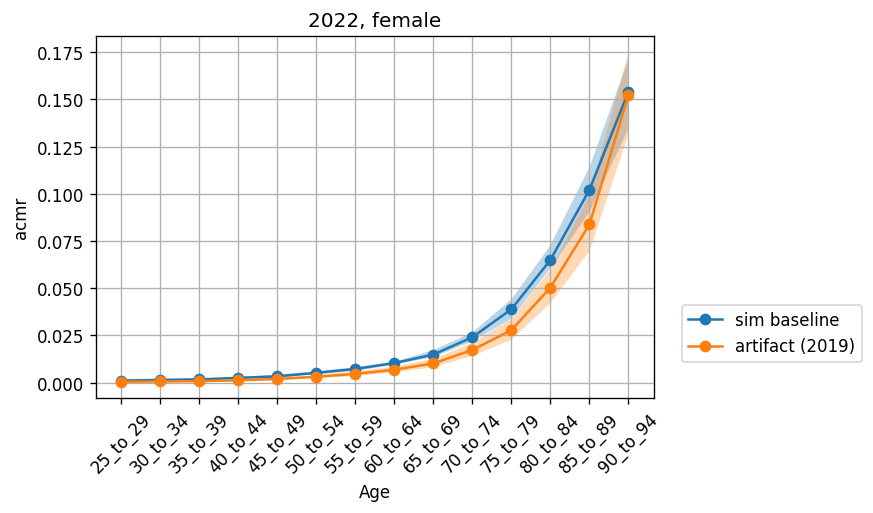

In [144]:
#here's an example of a single plot
plot_sim_vs_artifact(acmr, art_acmr, 2022, 2019, 'female', 'acmr')

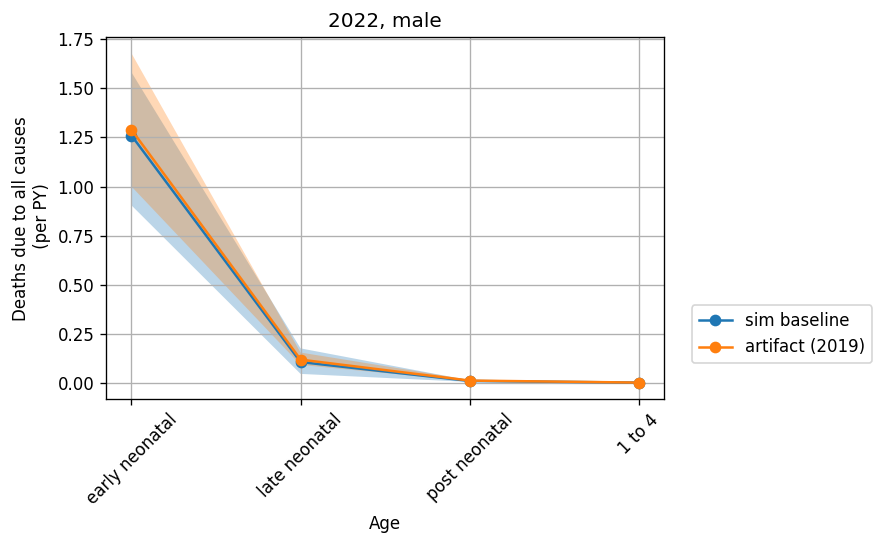

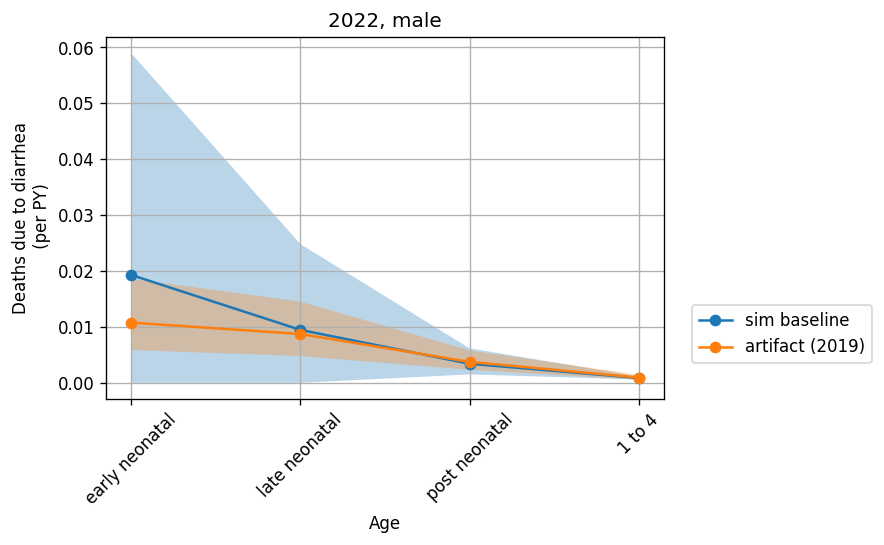

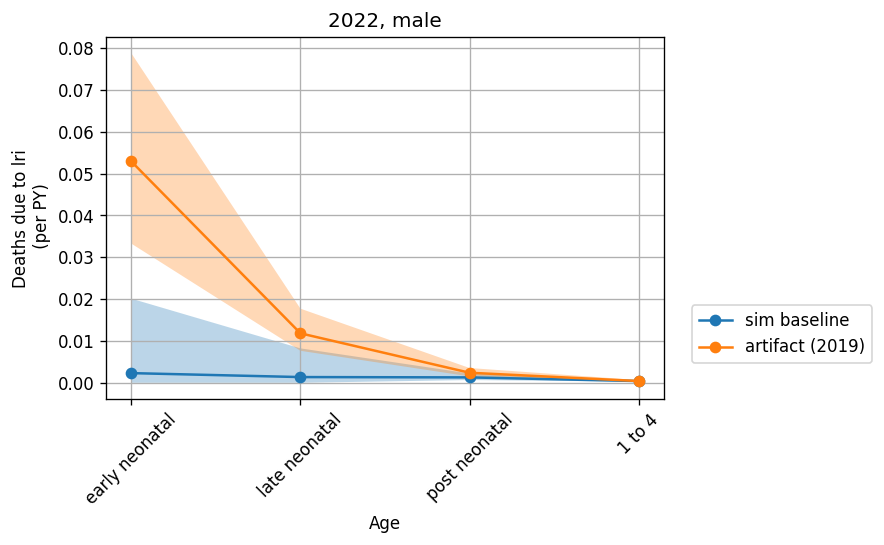

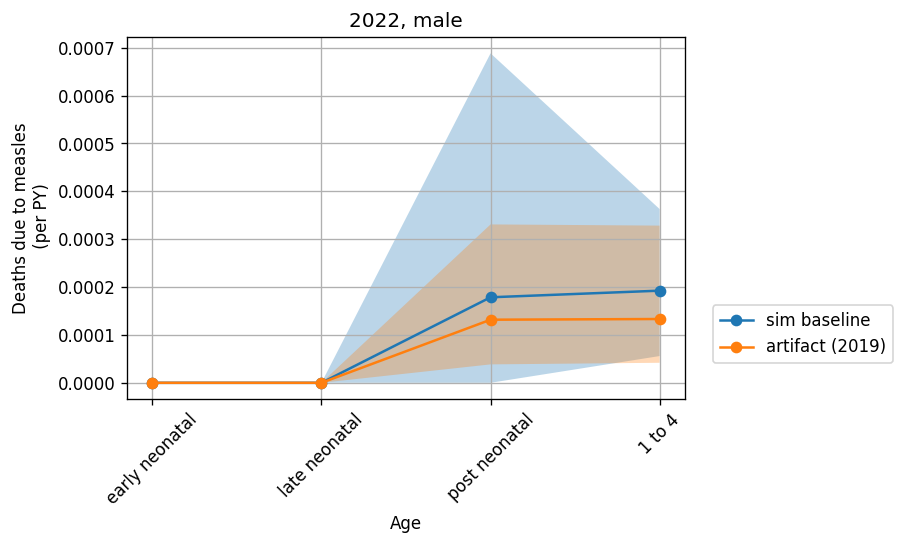

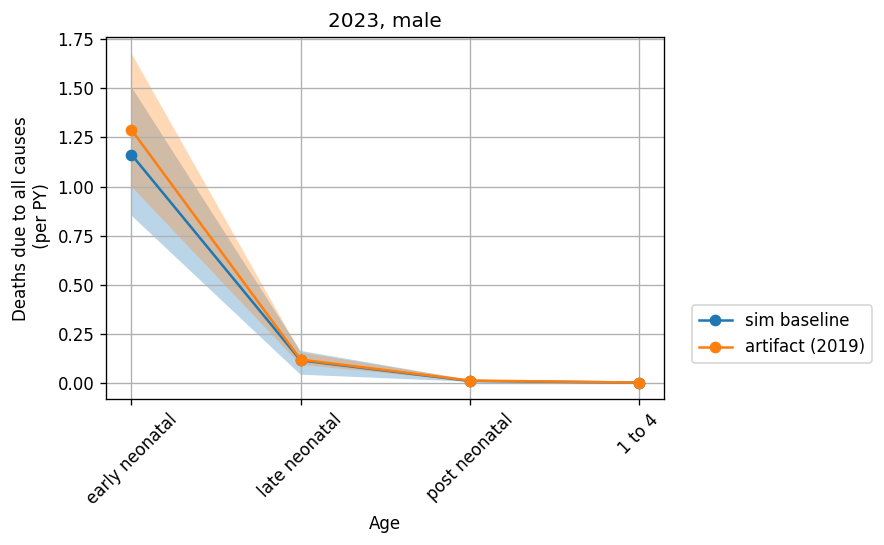

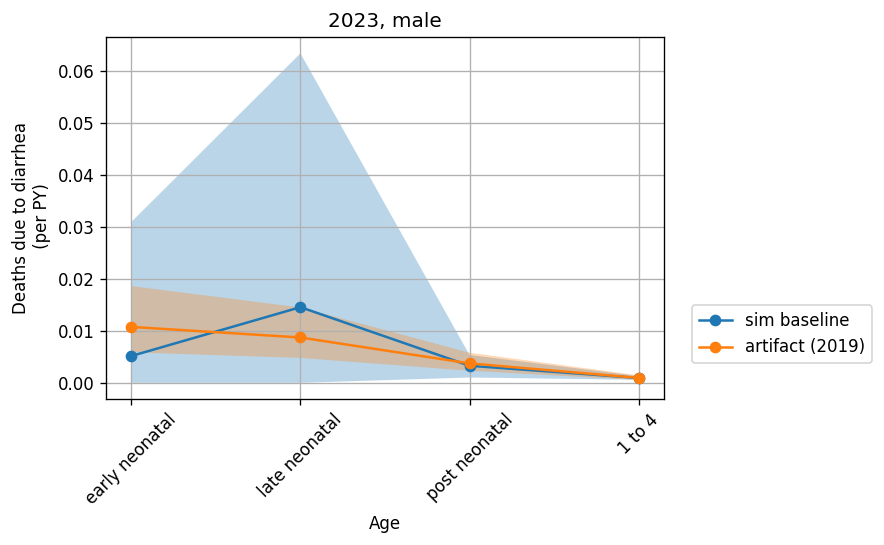

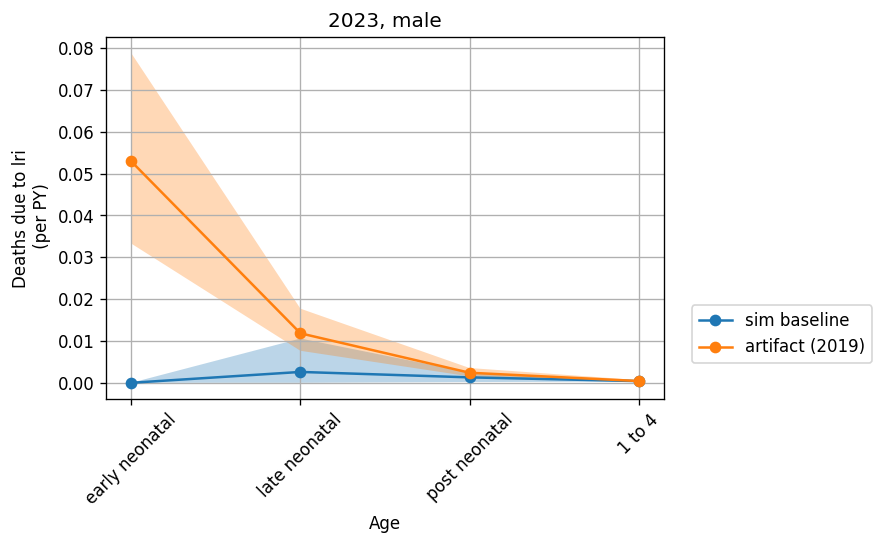

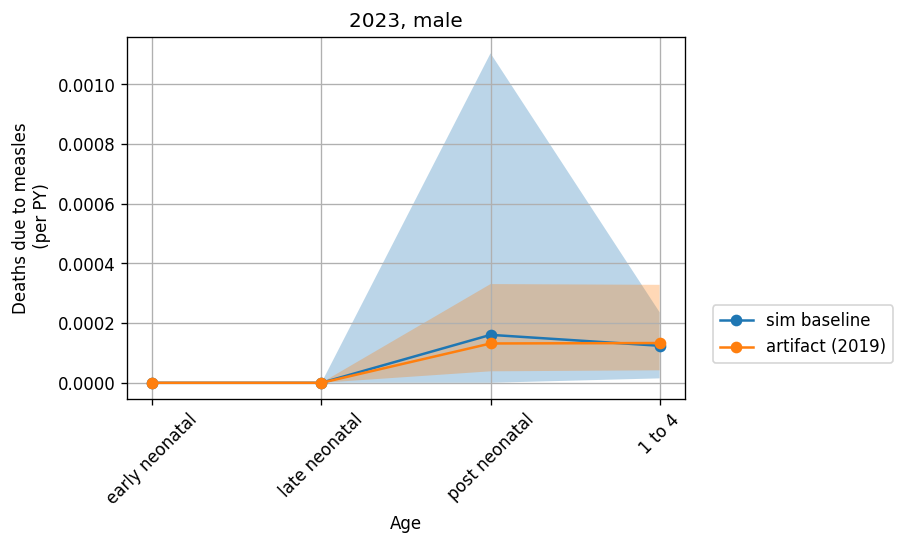

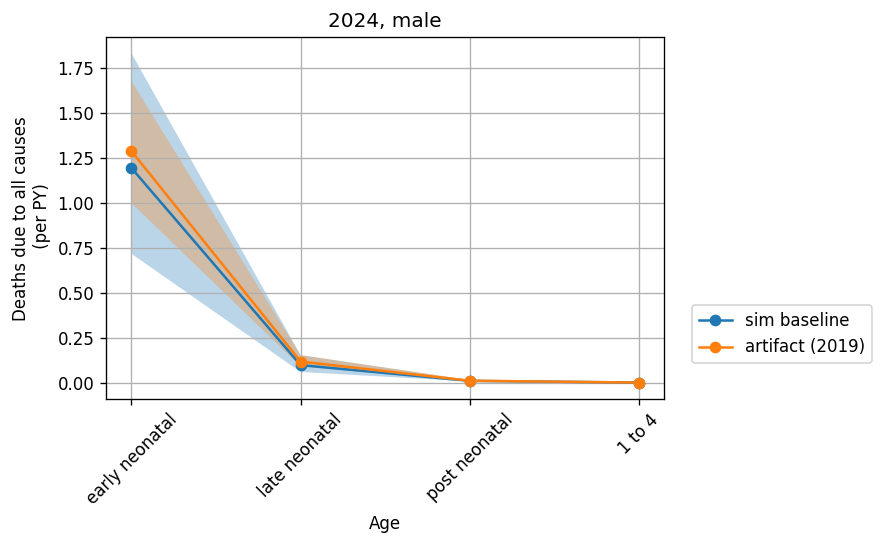

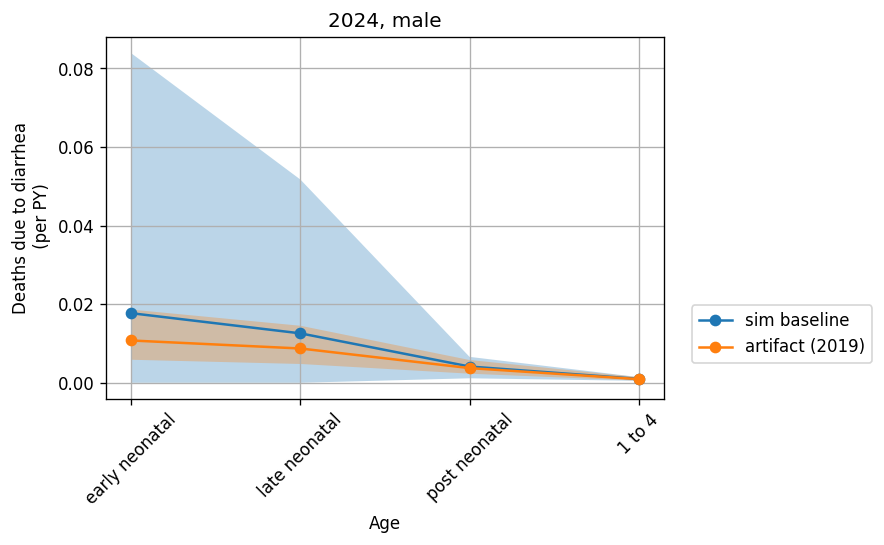

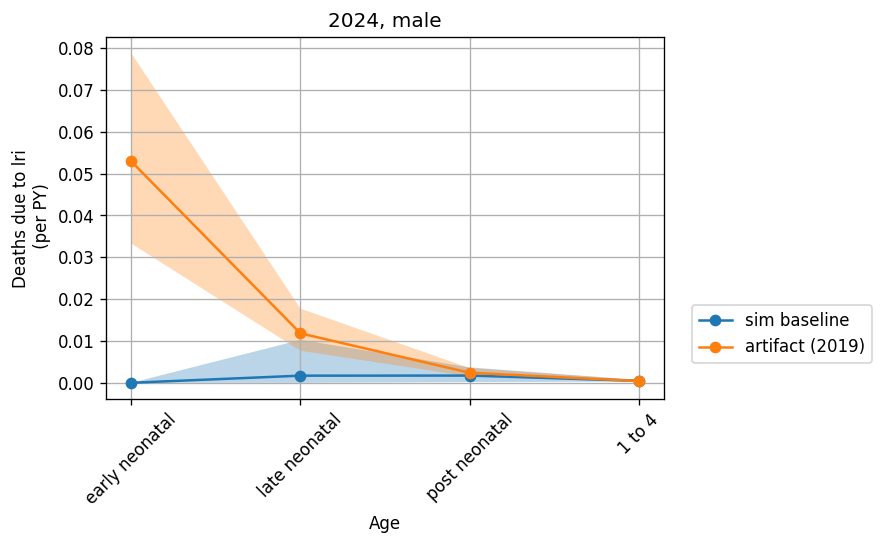

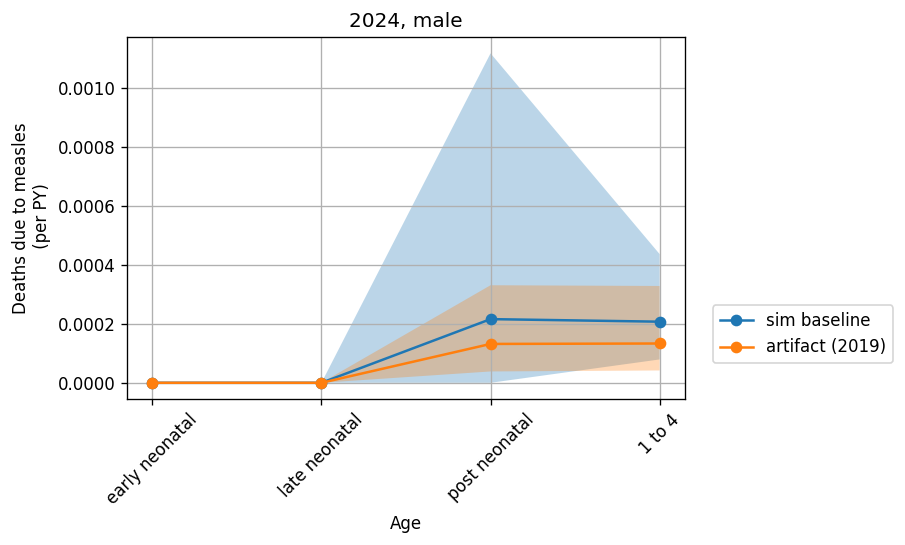

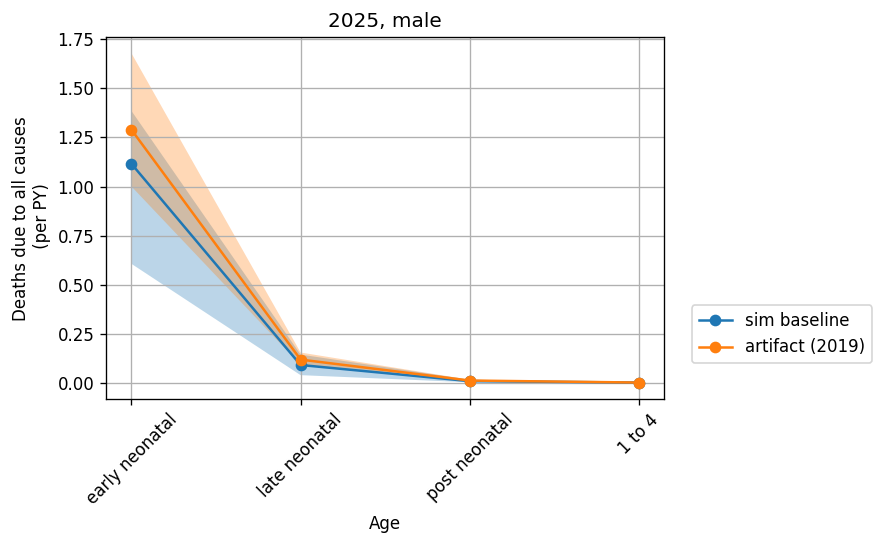

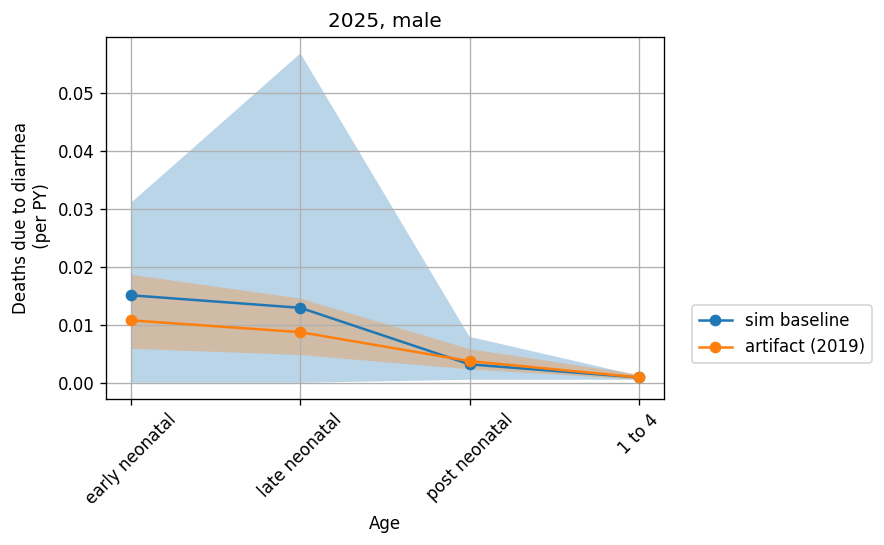

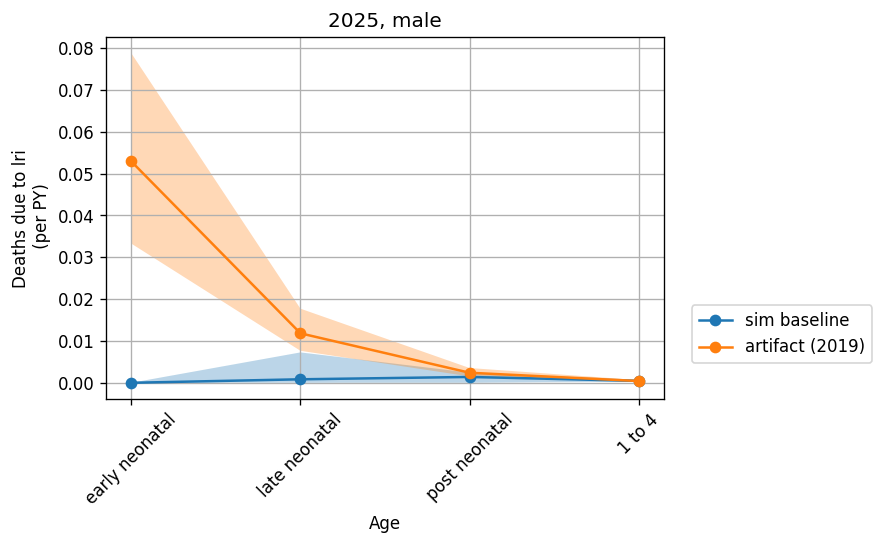

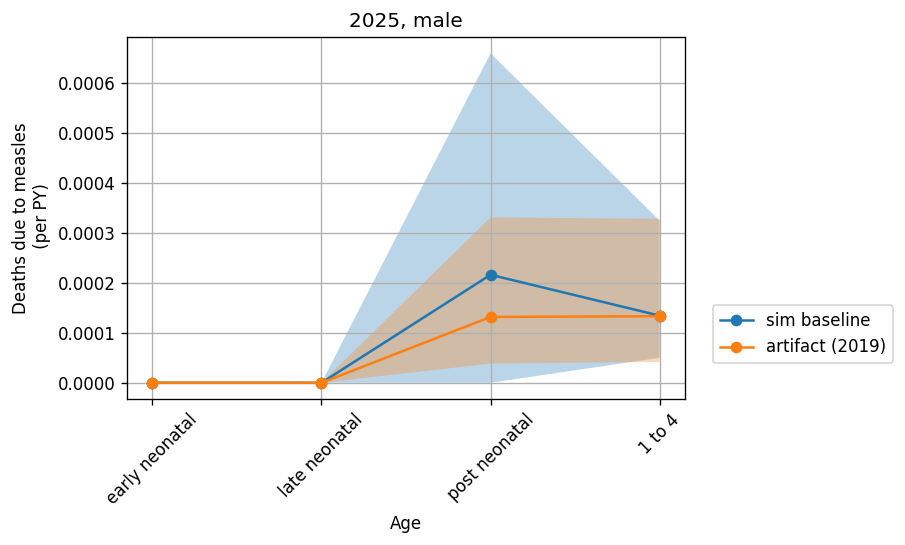

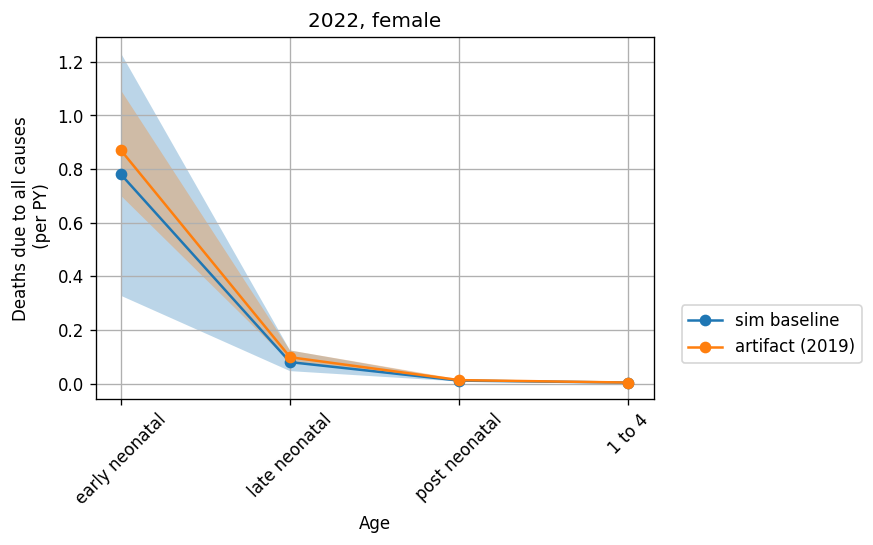

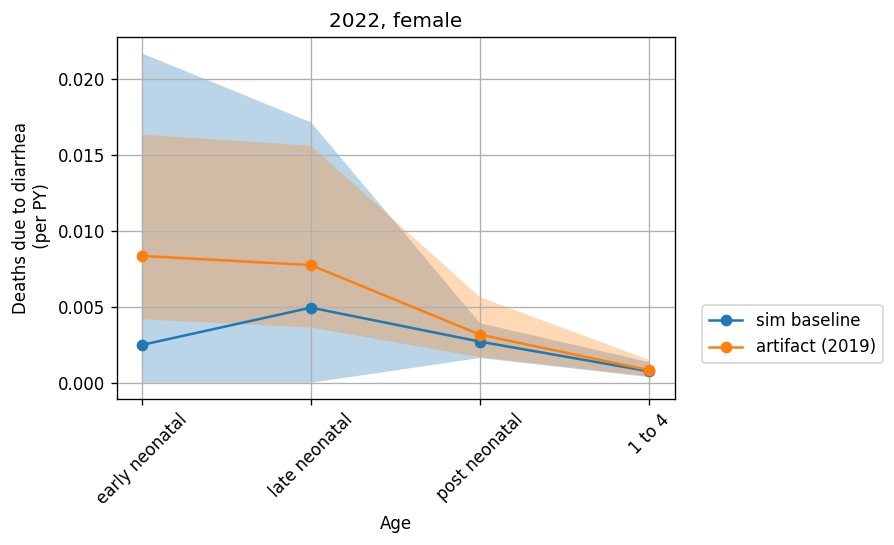

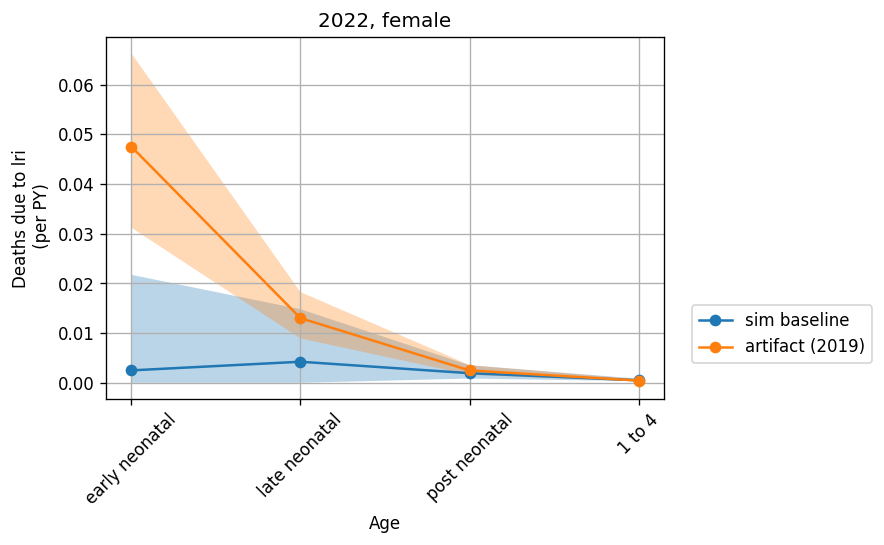

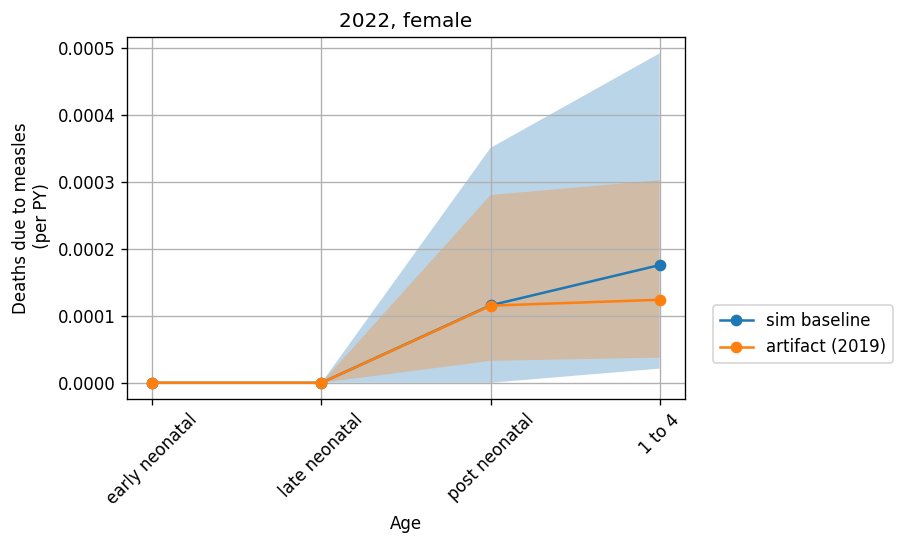

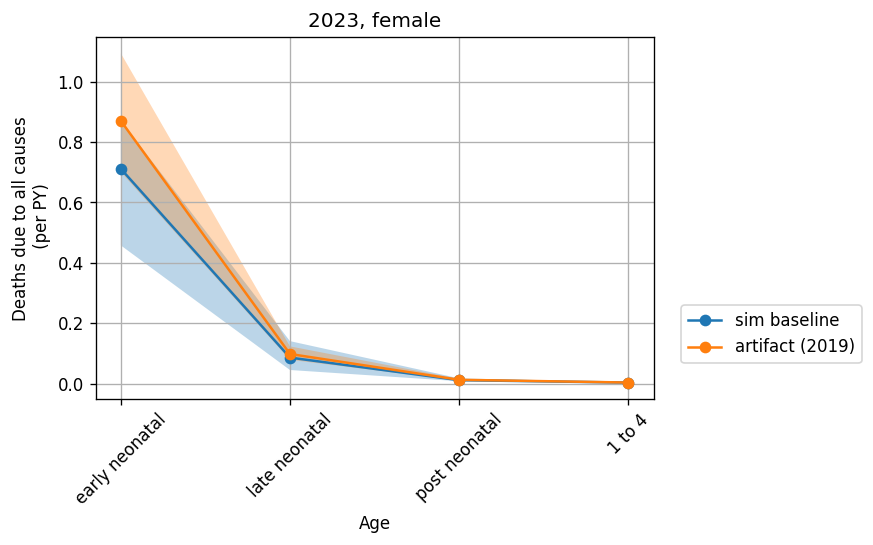

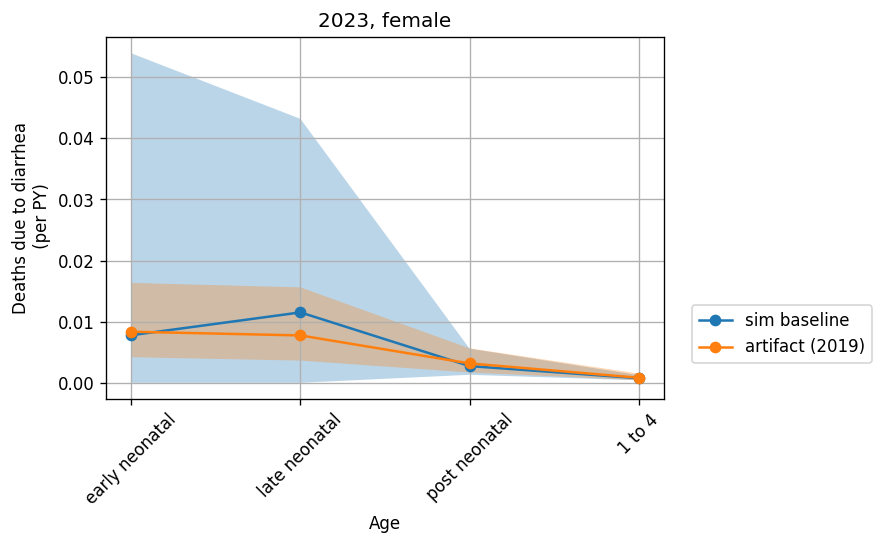

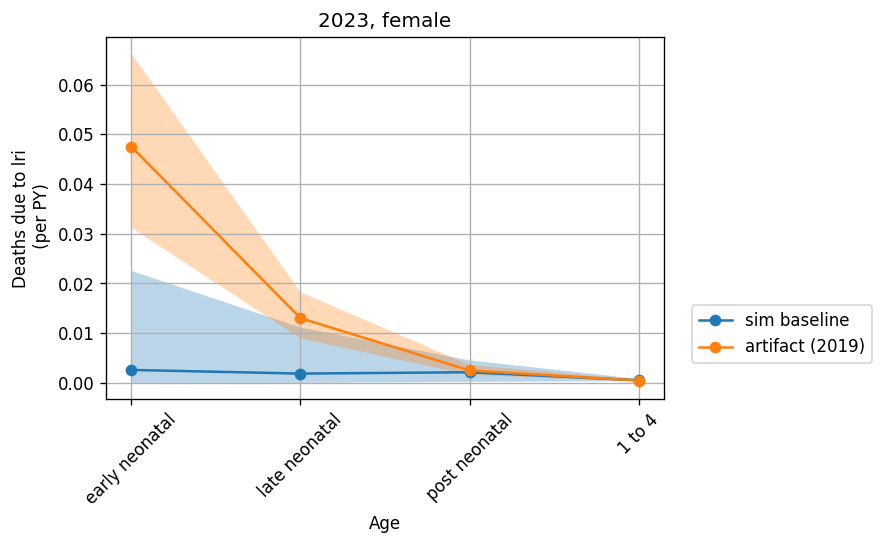

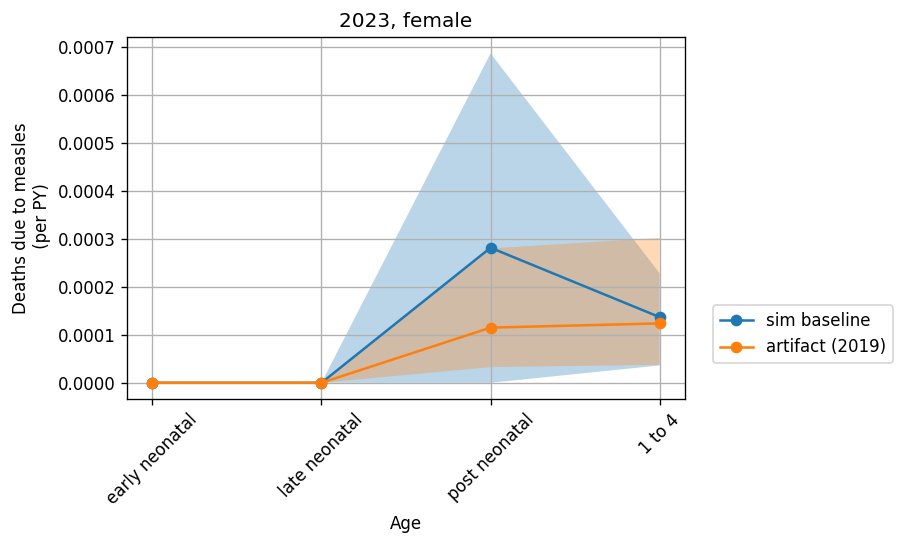

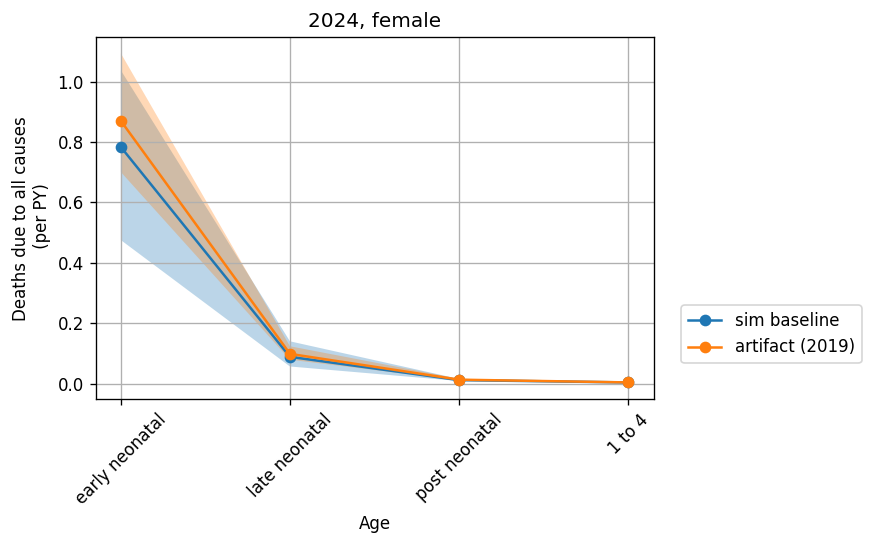

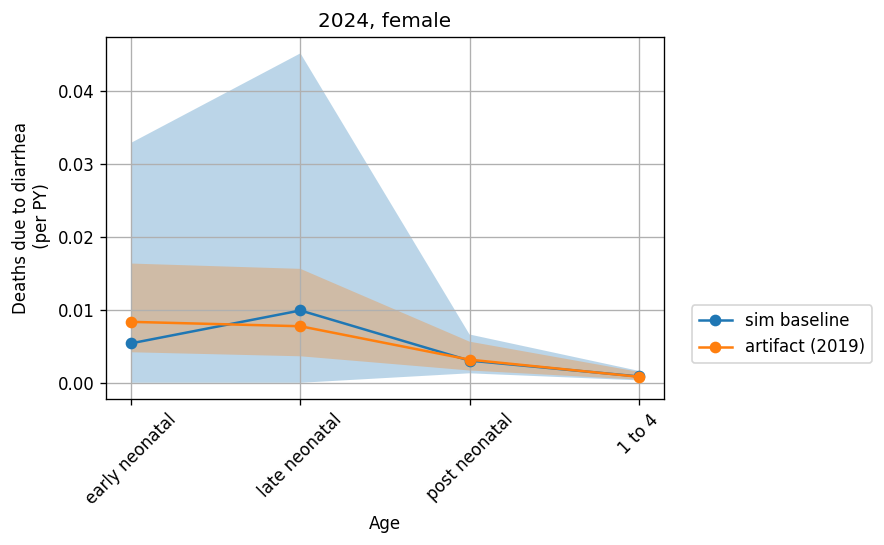

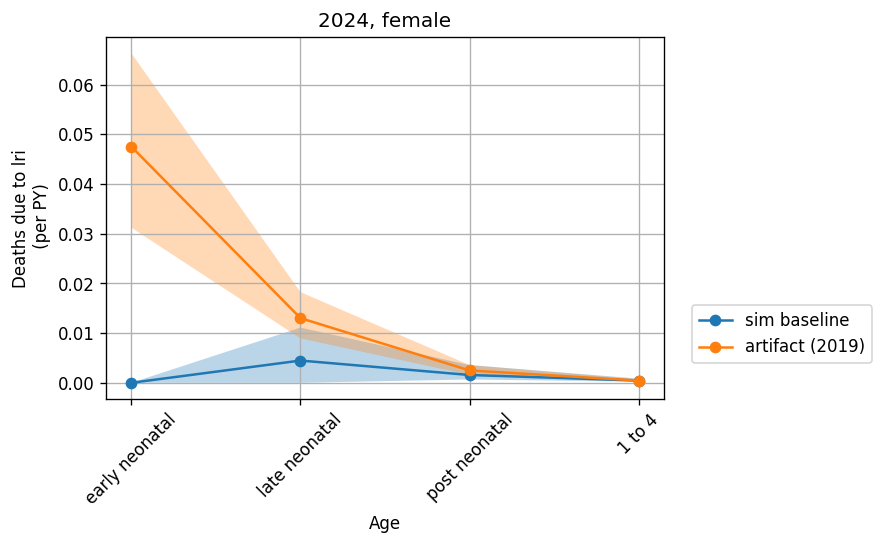

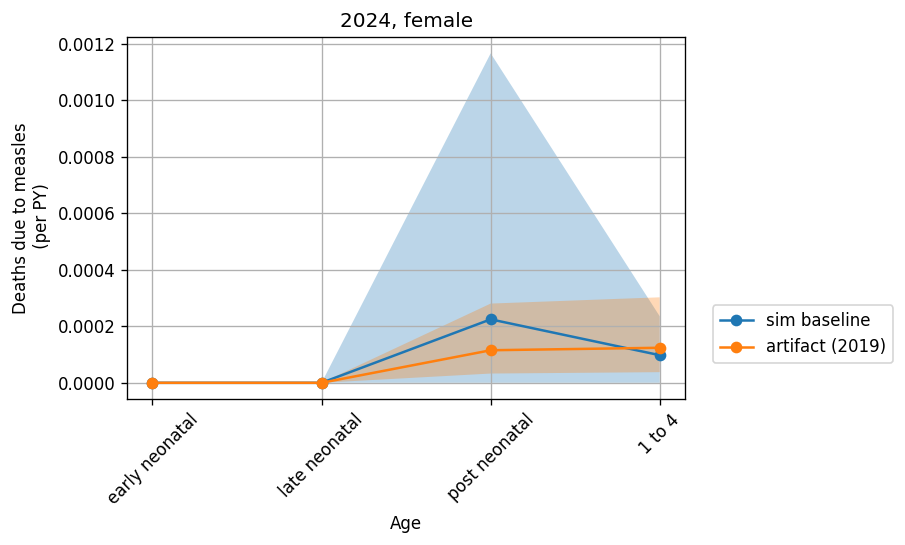

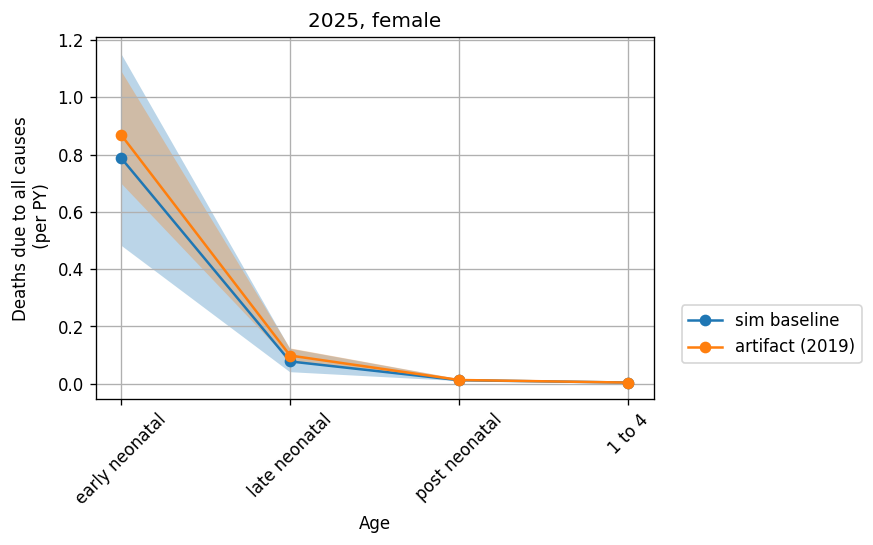

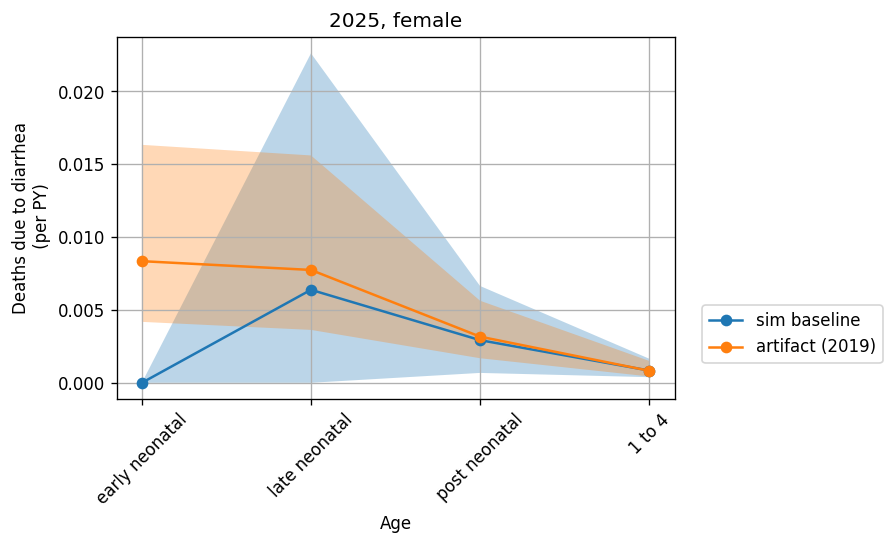

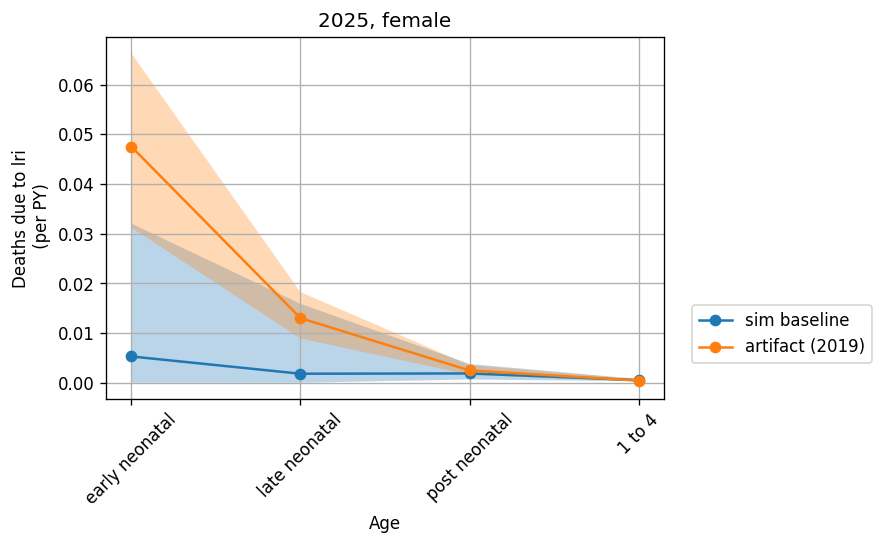

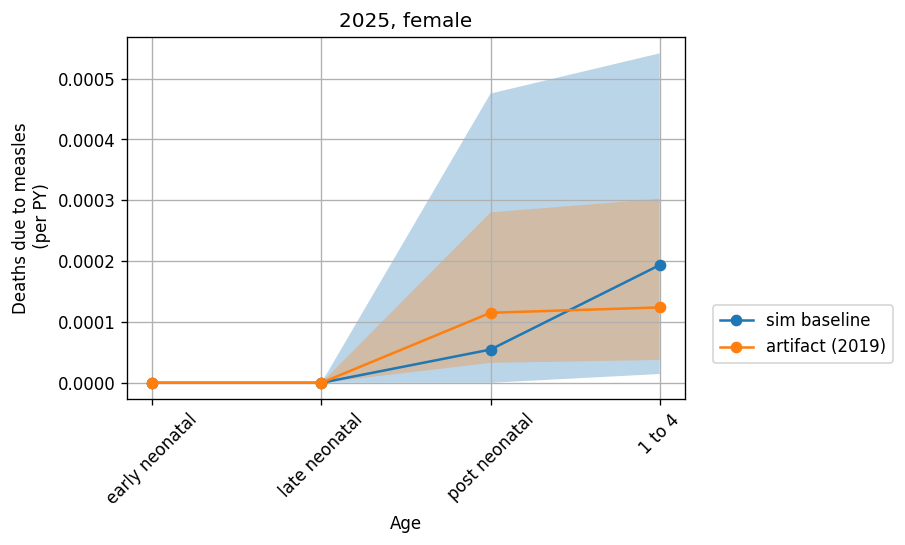

In [78]:
# example of plots of interest

# with PdfPages(output_dir + 'mortality.pdf') as pdf:
#     for sex in ['male', 'female']:
#         for sim_year in range(2022, 2026):
#             plot_sim_vs_artifact(acmr, art_acmr, sim_year, 2019, sex, 'acmr')
#             plot_sim_vs_artifact(deaths_ais, art_csmr_dd, sim_year, 2019, sex, 'csmr_dd')      
#             plot_sim_vs_artifact(deaths_lri, art_csmr_lri, sim_year, 2019, sex, 'csmr_lri') 
#             plot_sim_vs_artifact(deaths_msls, art_csmr_msls, sim_year, 2019, sex, 'csmr_msls') 
#             plot_sim_vs_artifact(deaths_other, art_csmr_other, sim_year, 2019, sex, 'csmr_other') no deaths due to other causes in artifact
#             pdf.savefig(bbox_inches='tight')

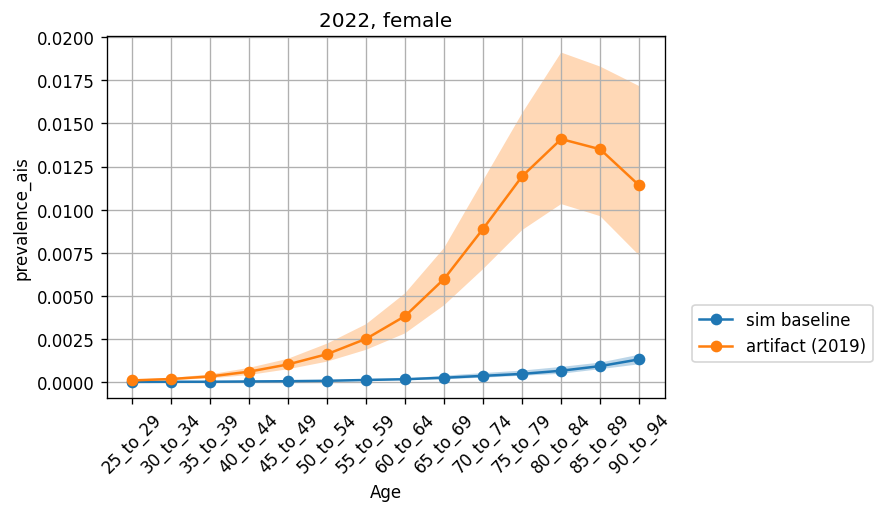

In [153]:
# example --- this makes no sense, because i plotted acute ischemic stroke from the sim vs angina in gbd
plot_sim_vs_artifact(prevalence_ais, art_prevalence_angina, 2022, 2019, 'female', 'prevalence_ais')

In [154]:
# with PdfPages(output_dir + 'prevalence.pdf') as pdf:
#     for sex in ['male', 'female']:
#         for sim_year in range(2022, 2026):
#             plot_sim_vs_artifact(prevalence_dd, art_prevalence_dd, sim_year, 2019, sex, 'prevalence_dd')
#             plot_sim_vs_artifact(prevalence_lri, art_prevalence_lri, sim_year, 2019, sex, 'prevalence_lri')
#             plot_sim_vs_artifact(prevalence_msls, art_prevalence_msls, sim_year, 2019, sex, 'prevalence_msls')
                
#             pdf.savefig(bbox_inches='tight')

In [155]:
# with PdfPages(output_dir + 'incidence.pdf') as pdf:
#     for sex in ['male', 'female']:
#         for sim_year in range(2022, 2026):
#             plot_sim_vs_artifact(incidence_dd, art_incidence_dd, sim_year, 2019, sex, 'incidence_dd')
#             plot_sim_vs_artifact(incidence_lri, art_incidence_lri, sim_year, 2019, sex, 'incidence_lri')
#             plot_sim_vs_artifact(incidence_msls, art_incidence_msls, sim_year, 2019, sex, 'incidence_msls')
           
#             pdf.savefig(bbox_inches='tight')

In [158]:
# with PdfPages(output_dir + 'remission.pdf') as pdf:
#     for sex in ['male', 'female']:
#         for sim_year in range(2022, 2026):
#             plot_sim_vs_artifact(remission_dd, art_remission_dd, sim_year, 2019, sex, 'remission_dd')
#             plot_sim_vs_artifact(remission_lri, art_remission_lri, sim_year, 2019, sex, 'remission_lri')
            #plot_sim_vs_artifact(remission_msls, art_remission_msls, sim_year, 2019, sex, 'remission_msls')
            
#             pdf.savefig(bbox_inches='tight')

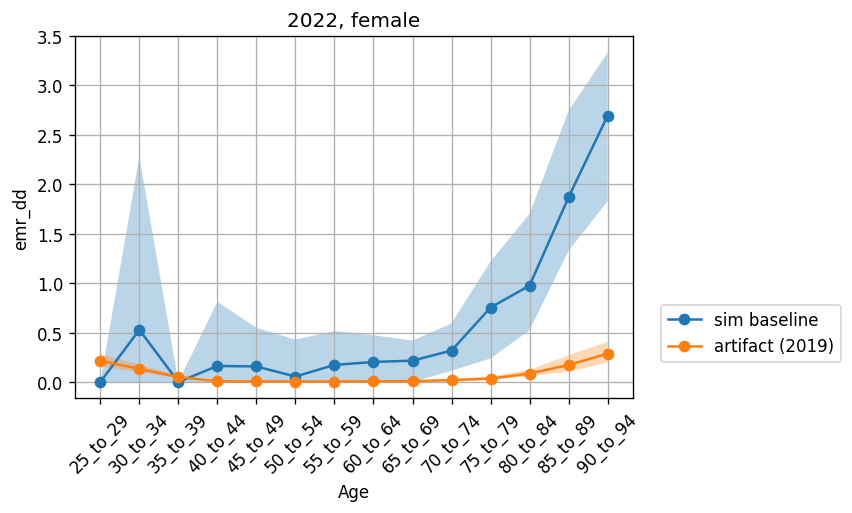

In [161]:
# again, this makes no sense, i'm comparing incomparable things as an example
plot_sim_vs_artifact(emr_ais, art_emr_angina, 2022, 2019, 'female', 'emr_dd')

In [162]:
# with PdfPages(output_dir + 'emr.pdf') as pdf:
#     for sex in ['male', 'female']:
#         for sim_year in range(2022, 2026):
#             plot_sim_vs_artifact(emr_dd, art_emr_dd, sim_year, 2019, sex, 'emr_dd')
#             plot_sim_vs_artifact(emr_lri, art_emr_lri, sim_year, 2019, sex, 'emr_lri')
#             plot_sim_vs_artifact(emr_msls, art_emr_msls, sim_year, 2019, sex, 'emr_msls')        
#             pdf.savefig(bbox_inches='tight')

================================== END ==============================================